# Logistic Regression on Titanic Dataset

This notebook demonstrates how to train a Logistic Regression classifier on the Titanic dataset. We will load the data, prepare it, train the model, and evaluate its performance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## Load the Data

First, let's load the Titanic dataset from a local CSV file named `titanic.csv`.

In [2]:
# Load the dataset
df = pd.read_csv('./../data/titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Data Preprocessing

Here, we will perform some basic preprocessing:
- Select relevant features.
- Handle missing values.
- Convert categorical variables into numerical using one hot encoding. 

In [4]:
# Select features and target variable
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived'

# Handle missing values
df['age'] = df['age'].fillna(df['age'].median())

# Convert categorical features to numerical

df['sex'] = 0
df.loc[df.sex == 'f', 'sex'] = 1



In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Prepare data for model training

Here, we define our X and y variables to be used for model training.

In [6]:
# Define X and y
X = df[features].copy()
y = df[target].copy()

In [7]:
X.fillna(-1, inplace = True)

## Split Data into Training and Testing Sets

We split the data into training and testing sets to evaluate the model's performance on unseen data.

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Logistic Regression Model

Now, let's initialize and train our Logistic Regression model using the training data.

In [9]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

Finally, let's evaluate the performance of the trained model using various metrics such as accuracy and confusion matrix.

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


Accuracy: 0.6718
Confusion Matrix:
[[131  13]
 [ 73  45]]


# Probabilities

`y_proba = model.predict_proba(X_test)`



In [11]:
y_proba = model.predict_proba(X_test)

In [12]:
y_proba[:,1]

array([0.18949981, 0.28720754, 0.22699918, 0.22712539, 0.2268799 ,
       0.47113908, 0.24433575, 0.37428374, 0.1924831 , 0.5549909 ,
       0.12754725, 0.18168452, 0.2823124 , 0.22699918, 0.20011542,
       0.2268799 , 0.22645417, 0.2384072 , 0.5181556 , 0.29247454,
       0.26425067, 0.54202686, 0.26870704, 0.55074534, 0.26188878,
       0.36383188, 0.28282218, 0.379281  , 0.2501482 , 0.50682059,
       0.38153002, 0.61975331, 0.18277616, 0.45260371, 0.55402006,
       0.22831458, 0.56580286, 0.3375744 , 0.5900282 , 0.6069959 ,
       0.36680902, 0.28167189, 0.29600192, 0.18218951, 0.30267351,
       0.22671634, 0.20390439, 0.28820136, 0.40194922, 0.26236233,
       0.62622126, 0.22712539, 0.42031346, 0.48255252, 0.27511689,
       0.46481655, 0.72860947, 0.93299338, 0.21594939, 0.2258301 ,
       0.39817408, 0.24778795, 0.66408775, 0.46481655, 0.79718717,
       0.71459568, 0.40991368, 0.14487091, 0.28367733, 0.30125636,
       0.52283538, 0.47395973, 0.28152642, 0.22130777, 0.60674

(array([ 1.,  0.,  1.,  3.,  4.,  1., 11.,  9., 10., 52., 14., 17., 14.,
         6.,  1.,  6.,  3.,  7., 13.,  9.,  4.,  3.,  3.,  9.,  3.,  6.,
         4.,  6.,  5.,  3.,  2., 10.,  2.,  2.,  5.,  3.,  1.,  2.,  3.,
         0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.06991153, 0.08717317, 0.1044348 , 0.12169644, 0.13895808,
        0.15621972, 0.17348135, 0.19074299, 0.20800463, 0.22526626,
        0.2425279 , 0.25978954, 0.27705117, 0.29431281, 0.31157445,
        0.32883609, 0.34609772, 0.36335936, 0.380621  , 0.39788263,
        0.41514427, 0.43240591, 0.44966754, 0.46692918, 0.48419082,
        0.50145246, 0.51871409, 0.53597573, 0.55323737, 0.570499  ,
        0.58776064, 0.60502228, 0.62228391, 0.63954555, 0.65680719,
        0.67406883, 0.69133046, 0.7085921 , 0.72585374, 0.74311537,
        0.76037701, 0.77763865, 0.79490028, 0.81216192, 0.82942356,
        0.8466852 , 0.86394683, 0.88120847, 0.89847011, 0.91573174,
        0.93299338]),
 <BarContainer

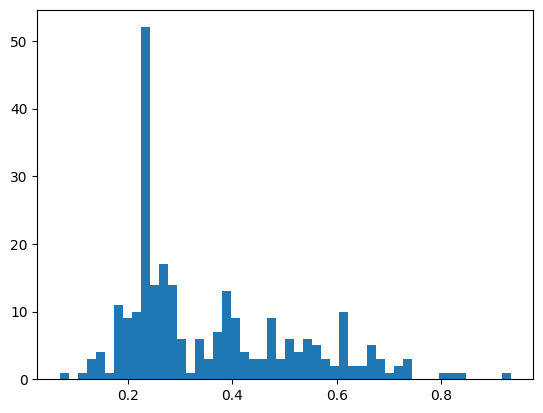

In [13]:
plt.hist(y_proba[:,1], bins = 50)